In [ ]:
78400*256 +256 +514

20071170

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import tensorflow as tf 
import cv2

In [ ]:
from keras.layers import Convolution2D, MaxPooling2D, Activation
from keras.models import Sequential

In [ ]:
a = np.array([[1,24,17,4,5],
             [8,4,13,9,15],
             [1,17,18,9,24],
             [24,19,12,4,5],
             [2,22,4,21,15]], dtype ='uint8')

b = np.array([[-67, 2, -23],
              [37, 57, -28],
              [52, -18,-40]], dtype= 'uint8')

c = np.array([[0, 2, 0],
              [37, 57, 0],
              [52, 0,0]], dtype= 'uint8')

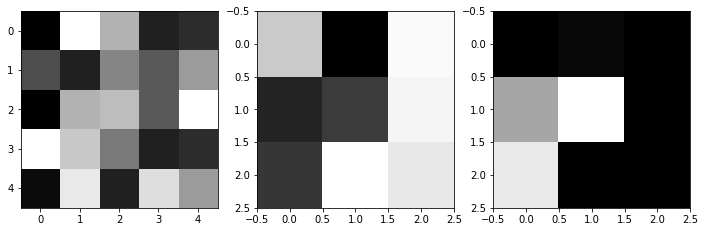

In [ ]:
fig, ax = plt.subplots(1,3, figsize=(12,12))

ax[0].imshow(a, cmap='gray')
ax[1].imshow(b, cmap='gray')
ax[2].imshow(c, cmap='gray')
plt.show()

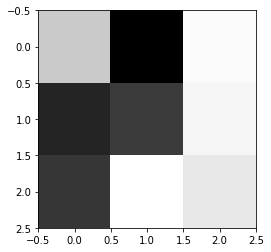

In [ ]:
plt.imshow(b, cmap='gray')

(960, 960, 3)


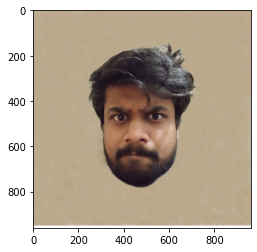

In [ ]:
path = '/content/me.jpg'
image1 = plt.imread(path)
image = image1.copy()
print(image.shape)
plt.imshow(image)
plt.show()

(800, 660, 3)


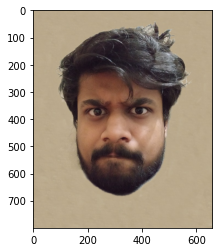

In [ ]:
image2 = image[100:900,150:810,:]
print(image2.shape)
plt.imshow(image2)
plt.show()

In [ ]:
image2[350:360,390:400,0]

array([[ 66,  59,  66,  81,  75,  83,  90,  90,  90, 105],
       [ 69,  71,  76,  70,  91,  84, 100,  95, 104, 109],
       [ 62,  79,  74,  78,  80,  85,  86,  91, 105,  94],
       [ 68,  62,  71,  73,  80,  63,  82,  81,  62,  82],
       [ 34,  49,  57,  56,  65,  54,  66,  71,  79,  70],
       [ 36,  37,  28,  35,  23,  39,  34,  36,  48,  57],
       [ 34,  33,  27,  29,  27,  25,  34,  32,  45,  50],
       [ 20,  27,  34,  25,  25,  29,  24,  28,  30,  42],
       [ 27,  22,  20,  24,  22,  29,  26,  28,  26,  35],
       [ 24,  26,  24,  25,  31,  29,  25,  24,  28,  25]], dtype=uint8)

<function matplotlib.pyplot.show>

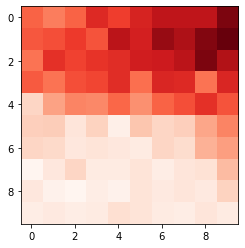

In [ ]:
plt.imshow(image2[350:360,390:400,0], cmap ='Reds')
plt.show

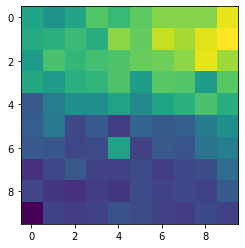

In [ ]:
a = np.array([[ 66,  59,  66,  81,  75,  83,  90,  90,  90, 105],
       [ 69,  71,  76,  70,  91,  84, 100,  95, 104, 109],
       [ 62,  79,  74,  78,  80,  85,  86,  91, 105,  94],
       [ 68,  62,  71,  73,  80,  63,  82,  81,  62,  82],
       [ 34,  49,  57,  56,  65,  54,  66,  71,  79,  70],
       [ 36,  47,  28,  35,  23,  39,  34,  36,  48,  57],
       [ 34,  33,  27,  29,  65,  25,  34,  32,  45,  50],
       [ 20,  27,  34,  25,  25,  29,  24,  28,  30,  42],
       [ 27,  22,  20,  24,  22,  29,  26,  28,  26,  35],
       [ 5,  26,  24,  25,  31,  29,  25,  24,  28,  25]], dtype= 'uint8')

plt.imshow(a)


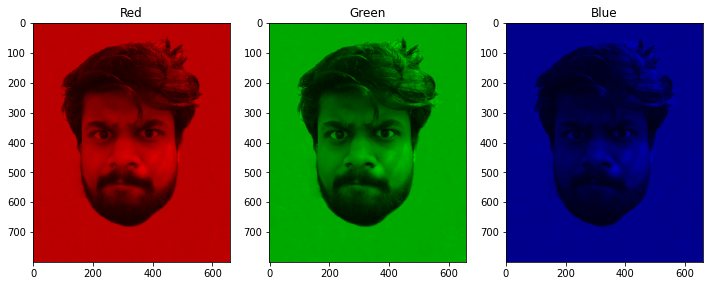

In [ ]:
fig,ax = plt.subplots(1,3, figsize=(12,12))
 
for i,color in enumerate(["Red","Green","Blue"]):
  temp = np.zeros((image2.shape), dtype = 'uint8')
  temp[:,:,i] = image2[:,:,i]
  ax[i].imshow(temp)
  ax[i].set_title(color)

plt.show()

(800, 660)


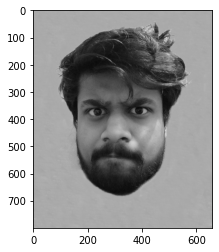

In [ ]:
def rgb2gray(rgb):
 
    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
 
    return gray.astype(int)
 
gray = rgb2gray(image2)
print(gray.shape)
plt.imshow(gray, cmap ='gray')
plt.show()

In [ ]:
gray

array([[170, 172, 170, ..., 170, 169, 169],
       [171, 171, 171, ..., 170, 169, 170],
       [171, 171, 172, ..., 169, 170, 170],
       ...,
       [172, 175, 174, ..., 173, 173, 174],
       [171, 173, 174, ..., 174, 173, 176],
       [171, 171, 171, ..., 172, 174, 172]])

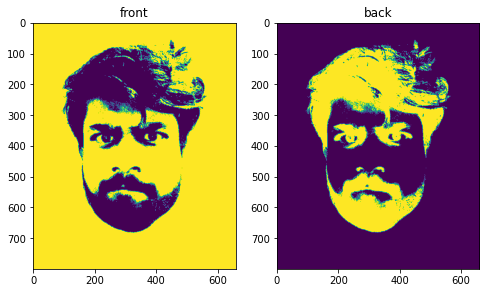

In [ ]:
threshold = 80
front = gray > threshold
back = gray <= threshold
fig,(ax1,ax2) = plt.subplots(1,2, figsize = (8,8))
 
ax1.imshow(front)
ax1.set_title("front")
ax2.imshow(back)
ax2.set_title("back")
plt.show()

In [ ]:
x_in = np.array([[
  [[2], [1], [2], [0], [1]],
  [[1], [3], [2], [2], [3]],
  [[1], [1], [3], [3], [0]],
  [[2], [2], [0], [1], [1]],
  [[0], [0], [3], [1], [2]], ]])

print(x_in.shape)
print(x_in)

(1, 5, 5, 1)
[[[[2]
   [1]
   [2]
   [0]
   [1]]

  [[1]
   [3]
   [2]
   [2]
   [3]]

  [[1]
   [1]
   [3]
   [3]
   [0]]

  [[2]
   [2]
   [0]
   [1]
   [1]]

  [[0]
   [0]
   [3]
   [1]
   [2]]]]


In [ ]:
kernel_in = np.array([
 [ [[2, 0.1]], [[3, 0.2]] ],
 [ [[0, 0.3]],[[1, 0.4]] ], ])

print(kernel_in.shape)
print(kernel_in)

(2, 2, 1, 2)
[[[[2.  0.1]]

  [[3.  0.2]]]


 [[[0.  0.3]]

  [[1.  0.4]]]]


In [ ]:
x = tf.constant(x_in, dtype=tf.float32)
x.shape

TensorShape([1, 5, 5, 1])

In [ ]:
kernel = tf.constant(kernel_in, dtype=tf.float32)
kernel.shape


TensorShape([2, 2, 1, 2])

In [ ]:
tf.nn.conv2d(x, kernel, strides=[1, 1, 1, 1], padding='VALID')

<tf.Tensor: shape=(1, 4, 4, 2), dtype=float32, numpy=
array([[[[10.       ,  1.9      ],
         [10.       ,  2.2      ],
         [ 6.       ,  1.6      ],
         [ 6.       ,  2.       ]],

        [[12.       ,  1.4      ],
         [15.       ,  2.2      ],
         [13.       ,  2.7      ],
         [13.       ,  1.7      ]],

        [[ 7.       ,  1.7      ],
         [11.       ,  1.3000001],
         [16.       ,  1.3      ],
         [ 7.       ,  1.       ]],

        [[10.       ,  0.6      ],
         [ 7.       ,  1.4000001],
         [ 4.       ,  1.5      ],
         [ 7.       ,  1.4      ]]]], dtype=float32)>

In [ ]:
blank = np.zeros((280,280,3), dtype = 'uint8')
rect = cv2.rectangle(blank.copy(), (60,60), (220,220), color = (255,0,0), thickness =-1)
circle = cv2.circle(blank.copy(), (140,140), 100, color = (0,255,0), thickness =-1)

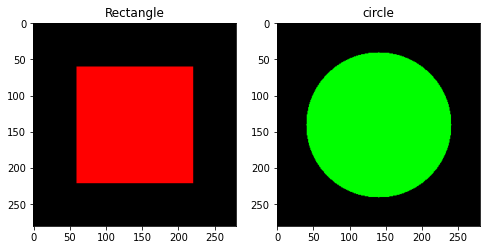

In [ ]:
fig,(ax1,ax2) = plt.subplots(1,2, figsize = (8,8))
 
ax1.imshow(rect)
ax1.set_title("Rectangle")
ax2.imshow(circle)
ax2.set_title("circle")
plt.show()

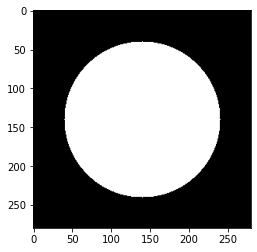

In [ ]:
'''img = cv2.cvtColor(rect, cv2.COLOR_BGR2GRAY)
plt.imshow(img, cmap = 'gray')
plt.show()'''

img = cv2.cvtColor(circle, cv2.COLOR_BGR2GRAY)
plt.imshow(img, cmap = 'gray')
plt.show()

In [ ]:
rect_small = plt.imread('/content/rect corner 1.jpg')
rect_small = cv2.cvtColor(rect_small, cv2.COLOR_BGR2GRAY)
rect_small.shape

(215, 214)

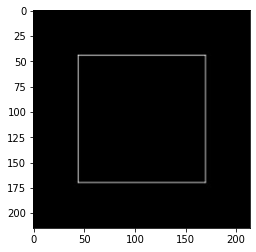

In [ ]:
plt.imshow(rect_small, cmap='gray')

In [ ]:
rs = cv2.resize(rect_small, (50,50))
rs.shape

(50, 50)

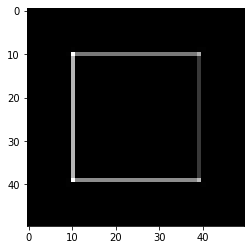

In [ ]:
plt.imshow(rs, cmap='gray')

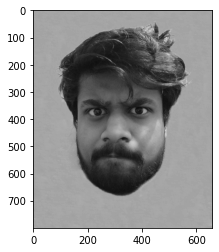

In [ ]:
img1 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)
plt.imshow(img1, cmap = 'gray')
plt.show()

In [ ]:
kernel = np.array([[-1, -1, -1],
                   [-1, 8, -1],
                   [-1, -1, -1]], dtype = np.float32)

kernel

array([[-1., -1., -1.],
       [-1.,  8., -1.],
       [-1., -1., -1.]], dtype=float32)

In [ ]:
out = cv2.filter2D(img, -1, kernel)
out.shape

(280, 280)

In [ ]:
out

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [ ]:
trial = out[50:80,50:80]
#print(trial)
print(trial.shape)

(30, 30)


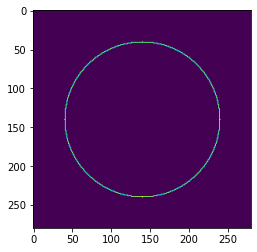

In [ ]:
plt.imshow(out)
plt.show()

(280, 280)

In [ ]:
print(img.shape)
img_batch = img.reshape(1, img.shape[0], img.shape[1],1)
print(img_batch.shape)

(280, 280)
(1, 280, 280, 1)


In [ ]:
model = Sequential()
model.add(Convolution2D(1, 3, padding = 'valid', input_shape = img_batch.shape[1:]))
model.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 278, 278, 1)       10        
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________


In [ ]:
output = model.predict(img_batch)
print(output.shape)
output = output.reshape(output.shape[1], output.shape[2])
output.shape

(1, 278, 278, 1)


(278, 278)

In [ ]:
output

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

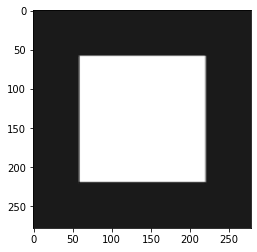

In [ ]:
plt.imshow(output, cmap='gray')

In [ ]:
kernel = np.array([[-1, -1, -1],
                   [-1, 8, -1],
                   [-1, -1, -1]], dtype = np.float32)

kernel

array([[-1., -1., -1.],
       [-1.,  8., -1.],
       [-1., -1., -1.]], dtype=float32)

In [ ]:
k = [np.array([[[[-1]], [[ -1]], [[-1]]],
              [[[-1]], [[8]], [[-1]]], 
              [[[-1]], [[ -1]], [[-1]]]
              ], dtype=np.float32), np.array([0.], dtype=np.float32)]

len(k)

2

In [ ]:
k_sobel_x = [np.array([[[[-1]], [[ -2]], [[-1]]],
              [[[0]], [[0]], [[0]]], 
              [[[-1]], [[ -2]], [[-1]]]
              ], dtype=np.float32), np.array([0.], dtype=np.float32)]

len(k_sobel_x)

2

In [ ]:
print(kernel)
print(kernel.shape)
kernel = kernel.reshape(1, kernel.shape[0], kernel.shape[1], 1)
print(kernel.shape)

[[-1. -1. -1.]
 [-1.  8. -1.]
 [-1. -1. -1.]]
(3, 3)
(1, 3, 3, 1)


In [ ]:
model.set_weights(k)
#model.get_weights()

In [ ]:
output = model.predict(img_batch)
print(output.shape)
output = output.reshape(output.shape[1], output.shape[2])
output.shape

(1, 278, 278, 1)


(278, 278)

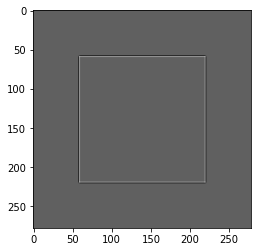

In [ ]:
plt.imshow(output, cmap='gray')

In [ ]:
model1 = Sequential()
model1.add(Convolution2D(1, 3, padding = 'valid', input_shape = img_batch.shape[1:]))
model1.add(Activation('relu'))
model1.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 278, 278, 1)       10        
_________________________________________________________________
activation_8 (Activation)    (None, 278, 278, 1)       0         
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________


In [ ]:
output = model1.predict(img_batch)
print(output.shape)
output = output.reshape(output.shape[1], output.shape[2])
output.shape

(1, 278, 278, 1)


(278, 278)

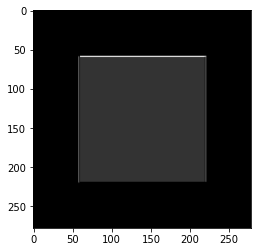

In [ ]:
plt.imshow(output, cmap='gray')

In [ ]:
model1.set_weights(k)

In [ ]:
output = model1.predict(img_batch)
print(output.shape)
output = output.reshape(output.shape[1], output.shape[2])
output.shape

(1, 278, 278, 1)


(278, 278)

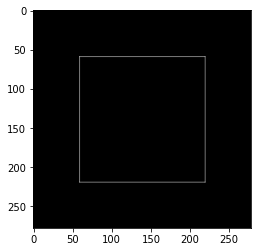

In [ ]:
plt.imshow(output, cmap='gray')

In [ ]:
model2 = Sequential()
model2.add(Convolution2D(1, 3, padding = 'same', input_shape = img_batch.shape[1:]))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=6))
model2.summary()

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_23 (Conv2D)           (None, 280, 280, 1)       10        
_________________________________________________________________
activation_13 (Activation)   (None, 280, 280, 1)       0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 46, 46, 1)         0         
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________


In [ ]:
output = model2.predict(img_batch)
print(output.shape)
output = output.reshape(output.shape[1], output.shape[2])
output.shape

(1, 46, 46, 1)


(46, 46)

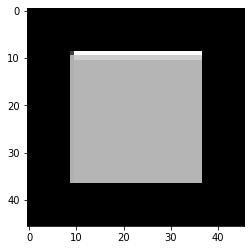

In [ ]:
plt.imshow(output, cmap='gray')

In [ ]:
model2.set_weights(k)

In [ ]:
output = model2.predict(img_batch)
print(output.shape)
output = output.reshape(output.shape[1], output.shape[2])
output.shape

(1, 46, 46, 1)


(46, 46)

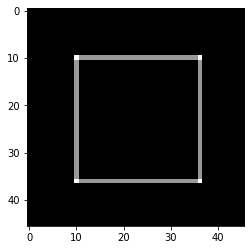

In [ ]:
plt.imshow(output, cmap='gray')